# Matplotlib Fundamentals


In [1]:
import pandas as pd
import duckdb

df = pd.read_csv('norway_new_car_sales_by_make.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'norway_new_car_sales_by_make.csv'

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [8]:
duckdb.query('''
SELECT make as brand,sum(quantity) as quantity FROM df
group by make 
order by quantity desc''').df()

,brand,quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
...,...,...
61,Martin Motors,1.0
62,Infiniti,1.0
63,Secma,1.0
64,Koenigsegg,1.0


In [9]:
df.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


In [ ]:
df.head(20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [15]:
df_quantity_brand =duckdb.query('''
SELECT make as brand,sum(quantity) as quantity FROM df
group by make 
order by quantity desc''').df()

## Bar chart


<Axes: xlabel='brand'>

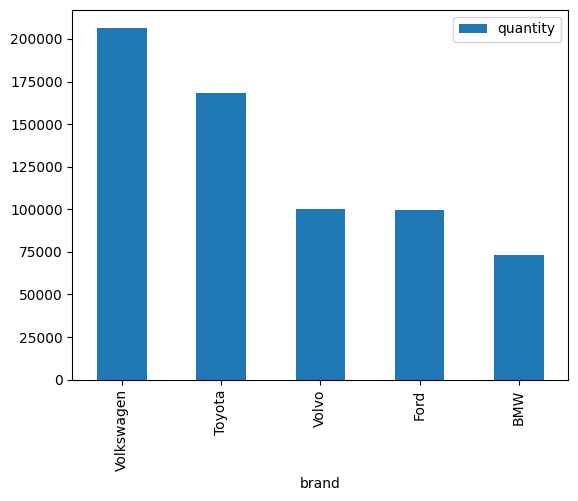

In [ ]:
df_quantity_brand.head().plot(kind = 'bar', x = 'brand', y = 'quantity')
## .head(20) to see more brands

<Axes: xlabel='brand'>

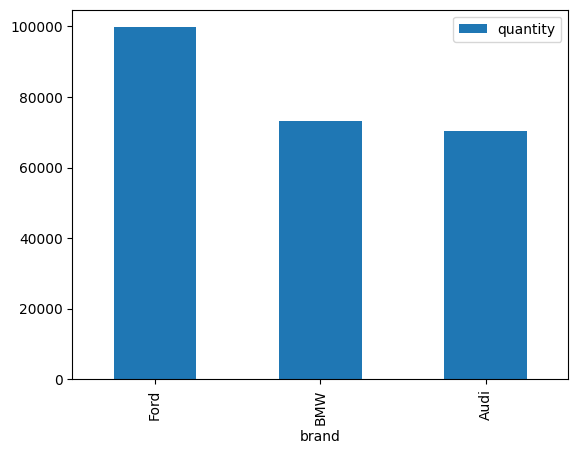

In [ ]:
df_quantity_brand.iloc[3:6].plot(kind = 'bar', x = 'brand', y = 'quantity')
# index 3 to 6 is inclusive of 3 and exclusive of 6, so it will plot the 4th, 5th and 6th rows of the dataframe.

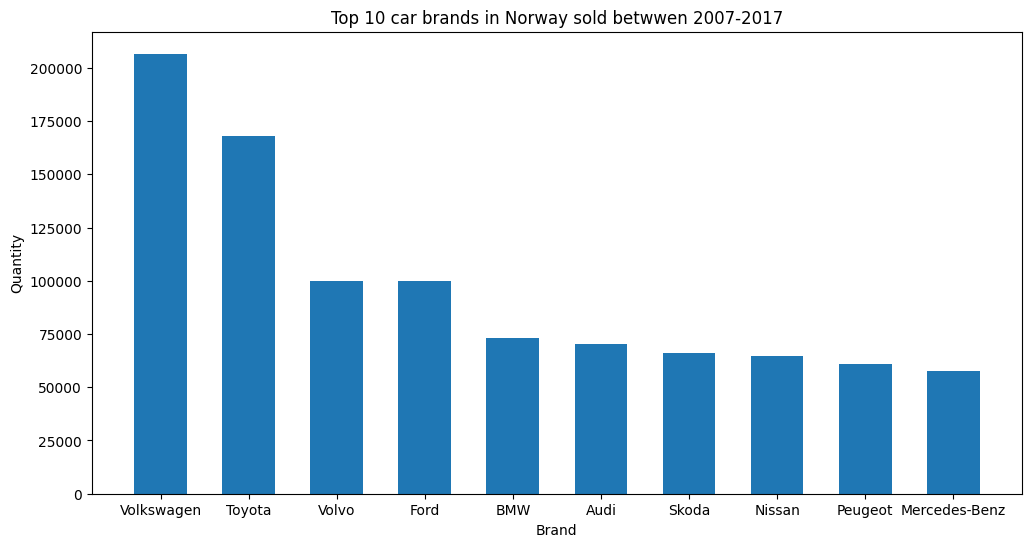

In [40]:
import matplotlib.pyplot as plt
df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x= df_quantity_brand_top10['brand'],
       height=df_quantity_brand_top10['quantity'],
       width=0.6)

ax.set(title='Top 10 car brands in Norway sold betwwen 2007-2017',
       xlabel='Brand',
       ylabel='Quantity')

fig.savefig('top_10_brands.png')


In [29]:
df_quantity_brand['quantity'],df_quantity_brand['brand']

(0     206669.0
 1     168177.0
 2      99937.0
 3      99713.0
 4      73315.0
         ...   
 61         1.0
 62         1.0
 63         1.0
 64         1.0
 65         1.0
 Name: quantity, Length: 66, dtype: float64,
 0        Volkswagen
 1            Toyota
 2             Volvo
 3              Ford
 4               BMW
           ...      
 61            Secma
 62             Tata
 63        Westfield
 64    Martin Motors
 65          McLaren
 Name: brand, Length: 66, dtype: object)

In [57]:
df_quantity_year =duckdb.query("""
             select year,sum(quantity) as Quantity from df group by year order by year asc """).df().set_index("Year")

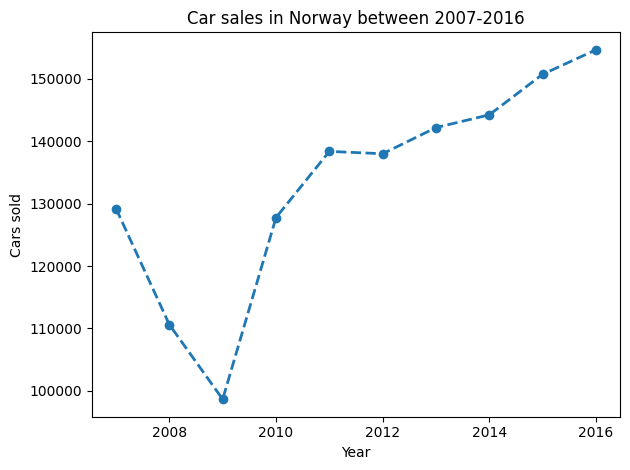

In [69]:
# Plotting the data
ax = df_quantity_year.iloc[:-1].plot(
    title="Car sales in Norway between 2007-2016",
    xlabel="Year",
    ylabel="Cars sold",
    style="--o",
    linewidth=2,
    legend=False,
)

# Adjusting the layout and saving the figure
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('../figures/car_sales_norway.png')

